#Step 1 - Load the data set

* After loading the dataset, we select the 3rd and 4th columns which will be our X1, X2 attributes respectively and the 9th column which provides the output-response y. 





In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import pandas as pd
import numpy as np
results = []
with open('DataSet2.txt') as inputfile:
    for line in inputfile:
        results.append(line.strip().split(';'))
    print(results[0:10])

data = pd.DataFrame(results, columns = list("abcdefghi"))
data = data.drop(['a', 'b'], 1)
data = data.drop(data.index[0])
data = data[['c', 'd', 'i']]
data = data[(data[['c','d','i']] != '?').all(axis=1)]
data



[['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], ['16/12/2006', '17:24:00', '4.216', '0.418', '234.840', '18.400', '0.000', '1.000', '17.000'], ['16/12/2006', '17:25:00', '5.360', '0.436', '233.630', '23.000', '0.000', '1.000', '16.000'], ['16/12/2006', '17:26:00', '5.374', '0.498', '233.290', '23.000', '0.000', '2.000', '17.000'], ['16/12/2006', '17:27:00', '5.388', '0.502', '233.740', '23.000', '0.000', '1.000', '17.000'], ['16/12/2006', '17:28:00', '3.666', '0.528', '235.680', '15.800', '0.000', '1.000', '17.000'], ['16/12/2006', '17:29:00', '3.520', '0.522', '235.020', '15.000', '0.000', '2.000', '17.000'], ['16/12/2006', '17:30:00', '3.702', '0.520', '235.090', '15.800', '0.000', '1.000', '17.000'], ['16/12/2006', '17:31:00', '3.700', '0.520', '235.220', '15.800', '0.000', '1.000', '17.000'], ['16/12/2006', '17:32:00', '3.668', '0.510', '233.990', '15.800', '0.000', '1.000', '17.

,c,d,i
1,4.216,0.418,17.000
2,5.360,0.436,16.000
3,5.374,0.498,17.000
4,5.388,0.502,17.000
5,3.666,0.528,17.000
6,3.520,0.522,17.000
7,3.702,0.520,17.000
8,3.700,0.520,17.000
9,3.668,0.510,17.000
10,3.662,0.510,16.000


# Some preprocessing

* Here, we assign float values to our dataframe's content and find the minimum and maximum values of each one of the **X1** and **X2** attributes.

In [2]:
L_float = data.as_matrix(columns=None)
#Convert all values to float.
data3D = L_float.astype(np.float)
print(data3D.shape)

#Find min, max values for both attributes.
lim1=data3D[:,0].min()
print(lim1)

lim2=data3D[:,0].max()
print(lim2)

print()

lim3=data3D[:,1].min()
print(lim3)

lim4=data3D[:,1].max()
print(lim4)

(2049280, 3)
0.076
11.122

0.0
1.39





* Next, we generate our new query data set, where the query's attributes **X1** and **X2** are  chosen from a **Multimodal Gaussian distribution**. The radius **z** is a relatively small, fixed value.





In [3]:
import random
import numpy as np
import os
mu11, mu12, sigma1 = np.random.uniform(lim1,lim2,1), np.random.uniform(lim1,lim2,1), (lim2 - lim1)/2 # mean and standard deviation
mu21, mu22, sigma2 = np.random.uniform(lim3,lim4,1), np.random.uniform(lim3,lim4,1), (lim4 - lim3)/2 # mean and standard deviation

X1, X2 = np.empty([200,1]), np.empty([200,1])
#Generate X1,X2 using multi-modal Gaussian (Normal) distribution and a fixed z.
for count in range(200):
  #True random number generation.
  #https://stackoverflow.com/questions/33359740/random-number-between-0-and-1-in-python
  P = int.from_bytes(os.urandom(8), byteorder="big") / ((1 << 64) - 1) 
  if P>0.5:
    X1[count] = np.abs(np.random.normal(mu11, sigma1, 1))
  else:
    X1[count] = np.abs(np.random.normal(mu12, sigma1, 1))

for count in range(200):
  P = int.from_bytes(os.urandom(8), byteorder="big") / ((1 << 64) - 1)
  if P>0.5:
    X2[count] = np.abs(np.random.normal(mu21, sigma2, 1))
  else:
    X2[count] = np.abs(np.random.normal(mu22, sigma2, 1))
  
  
z1 = 0.05*(lim2 - lim1)
z2 = 0.05*(lim4 - lim3)
z = np.sqrt(z1**2 + z2**2) #z value is fixed.


print(X1)
print()
print(X2)
print()
print(z)


[[7.83107603e+00]
 [1.85526677e+01]
 [5.06024457e+00]
 [1.12264508e+01]
 [8.22232845e+00]
 [1.43758366e+01]
 [2.34184849e+00]
 [1.18815435e+01]
 [9.53170834e+00]
 [5.93891984e+00]
 [5.86397050e+00]
 [4.76853747e-01]
 [1.41308468e+01]
 [1.17774707e+01]
 [1.35224470e+01]
 [1.77409389e+01]
 [1.03788223e+01]
 [5.35962859e+00]
 [7.48340243e+00]
 [1.30221130e+00]
 [6.78887480e+00]
 [1.10307466e+01]
 [1.23839521e+01]
 [1.28023801e+01]
 [5.13733418e+00]
 [9.43839551e-01]
 [6.21310582e-01]
 [1.00788875e+01]
 [1.72962275e+01]
 [1.01808790e+01]
 [1.28111875e+01]
 [5.30990748e+00]
 [6.36761406e+00]
 [4.68724494e+00]
 [1.31896789e+01]
 [6.03593531e+00]
 [2.07882721e+00]
 [2.15665372e+00]
 [9.54313649e+00]
 [1.54339320e+01]
 [3.45697782e+00]
 [2.14256940e+00]
 [1.26629781e+01]
 [1.01298851e+01]
 [9.39748200e+00]
 [8.05037788e+00]
 [2.08401222e-01]
 [4.45019770e+00]
 [1.35912470e+00]
 [4.16116057e+00]
 [4.62305502e+00]
 [6.16074852e+00]
 [4.80357535e+00]
 [2.16219886e+00]
 [7.28581625e+00]
 [2.003844

* We **merge** the lists of X1, X2 and z into one array.

In [4]:
X1_flattened = (X1.T).ravel()
X2_flattened = (X2.T).ravel()
QA_dataset = np.empty((len(X1),4))
QA_dataset[:,0] = X1_flattened
QA_dataset[:,1] = X2_flattened
QA_dataset[:,2] = z
QA_dataset[:,3] = 0
print(QA_dataset)

[[7.83107603e+00 7.10865847e-01 5.56655675e-01 0.00000000e+00]
 [1.85526677e+01 8.58967635e-01 5.56655675e-01 0.00000000e+00]
 [5.06024457e+00 1.27350218e+00 5.56655675e-01 0.00000000e+00]
 [1.12264508e+01 3.01832871e-01 5.56655675e-01 0.00000000e+00]
 [8.22232845e+00 1.41965314e-01 5.56655675e-01 0.00000000e+00]
 [1.43758366e+01 1.34725224e+00 5.56655675e-01 0.00000000e+00]
 [2.34184849e+00 2.03817535e-01 5.56655675e-01 0.00000000e+00]
 [1.18815435e+01 4.12526417e-01 5.56655675e-01 0.00000000e+00]
 [9.53170834e+00 1.06514856e+00 5.56655675e-01 0.00000000e+00]
 [5.93891984e+00 1.13510244e+00 5.56655675e-01 0.00000000e+00]
 [5.86397050e+00 5.04008318e-01 5.56655675e-01 0.00000000e+00]
 [4.76853747e-01 1.29589651e+00 5.56655675e-01 0.00000000e+00]
 [1.41308468e+01 9.72018004e-01 5.56655675e-01 0.00000000e+00]
 [1.17774707e+01 5.95293249e-03 5.56655675e-01 0.00000000e+00]
 [1.35224470e+01 1.66362660e+00 5.56655675e-01 0.00000000e+00]
 [1.77409389e+01 8.54985531e-02 5.56655675e-01 0.000000

# Step 2 - Training the Model

* Here we calculate the true answers of QA_dataset array, based on the downloaded dataset data3D.
For this purpose, we use the *calculate_y()* function.

In [5]:
def calculate_y(query_data, data):
  average_y = []   
  #We populate the list
  for validation_datapoint in query_data:
    y, y_final = [], []
    iter=0
    for query_datapoint in data:
      #Check if the incoming datapoint satisfies the condition, according to which it's distance from the validation datapoint is smaller or equal,
      #to the radius z of the circle with center C(X1,X2), where validation_datapoint q=[X1,X2,z].
      if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**2):
        y.append(query_datapoint[2])
        iter+=1
    #If there is no data point assigned to our query, increase (double) the radius. 
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]):
          y.append(query_datapoint[2])
          iter+=1  
    #If, still there is no data point assigned to our query, increase (double) the radius.
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**(1/2)):
          y.append(query_datapoint[2])
          iter+=1
    y_final = np.asarray(y)  
    #Calculate the average value of y.
    average_y.append(np.mean(y_final, axis=0))  
  return(average_y)    
            
        
      
#Run the algorithm.      
x_list = calculate_y(QA_dataset, data3D[0:2000000])
#print(x_list)
#In case there is a query that did not match to any datapoint from data3D, to avoid error in calculations due to NaN, we set 0 value.
x_array = np.asarray(x_list)
replace = np.isnan(x_array)
x_array[replace] = 0
#We store y in the list, real_y.
real_y = x_array
print(real_y)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[16.16346154  0.         16.71604938 16.         16.52339688  0.
 13.72644034 16.         16.         14.31496063 15.46159905  0.46153846
  0.         16.          0.          0.          0.         14.88176198
 17.33333333  7.32665319 15.59356287 16.25        0.          0.
 14.54873069  0.          0.70496532 15.76470588  0.         15.76470588
  0.         14.76635974 15.08388521 14.50923549  0.         15.46180556
 14.21127442 13.94359595 16.23214286  0.         13.47013352 13.9918046
  0.         16.         16.         16.31578947  0.51245664 14.54994225
 13.70500723 14.95       15.16788321 15.50965251  6.33333333 12.63919926
 15.83881579  9.79746835 14.90120235 16.05555556 16.         15.45205186
  0.         15.75969485 16.33333333 15.44270833 16.56150794 16.17252931
  0.         14.71875115 15.08333333 15.86486486  0.         15.94166667
 14.44038285 16.43165468 16.55348048  0.         14.53217278 14.11987561
 14.8        15.48228571 15.43820225 16.15789474  0.         16.1119

* We **merge** the true answers **y** with the **X1**, **X2** and **z** attributes of the QA_dataset, into a new matrix of 4 columns with attributes X1, X2, z, y in incremental order.

In [6]:
QA_dataset[:,3] = real_y
print(QA_dataset)

[[7.83107603e+00 7.10865847e-01 5.56655675e-01 1.61634615e+01]
 [1.85526677e+01 8.58967635e-01 5.56655675e-01 0.00000000e+00]
 [5.06024457e+00 1.27350218e+00 5.56655675e-01 1.67160494e+01]
 [1.12264508e+01 3.01832871e-01 5.56655675e-01 1.60000000e+01]
 [8.22232845e+00 1.41965314e-01 5.56655675e-01 1.65233969e+01]
 [1.43758366e+01 1.34725224e+00 5.56655675e-01 0.00000000e+00]
 [2.34184849e+00 2.03817535e-01 5.56655675e-01 1.37264403e+01]
 [1.18815435e+01 4.12526417e-01 5.56655675e-01 1.60000000e+01]
 [9.53170834e+00 1.06514856e+00 5.56655675e-01 1.60000000e+01]
 [5.93891984e+00 1.13510244e+00 5.56655675e-01 1.43149606e+01]
 [5.86397050e+00 5.04008318e-01 5.56655675e-01 1.54615991e+01]
 [4.76853747e-01 1.29589651e+00 5.56655675e-01 4.61538462e-01]
 [1.41308468e+01 9.72018004e-01 5.56655675e-01 0.00000000e+00]
 [1.17774707e+01 5.95293249e-03 5.56655675e-01 1.60000000e+01]
 [1.35224470e+01 1.66362660e+00 5.56655675e-01 0.00000000e+00]
 [1.77409389e+01 8.54985531e-02 5.56655675e-01 0.000000

* Here we apply **Principal Component Analysis** on QA_dataset and use the **RPCL** algorithm to cluster the new query-answer data set of 2 dimensions.

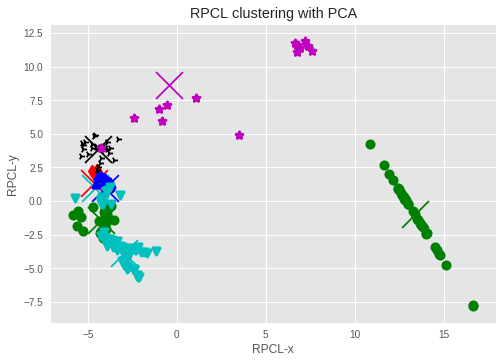

		 Cluster 1 has: 33 data points
		 Cluster 2 has: 47 data points
		 Cluster 3 has: 7 data points
		 Cluster 4 has: 18 data points
		 Cluster 5 has: 26 data points
		 Cluster 6 has: 14 data points
		 Cluster 7 has: 39 data points
		 Cluster 8 has: 16 data points


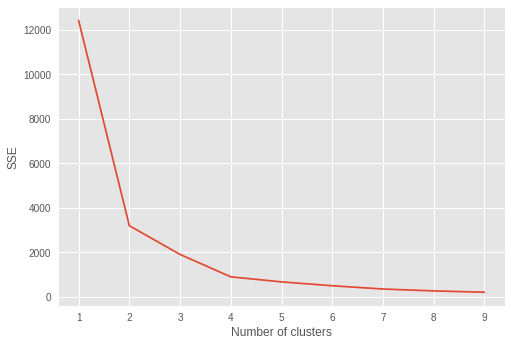

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(QA_dataset)
#print(sklearn_pca_x)


markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a givn list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=8):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints (>=10% of total data), then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>19):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

#We call the fit() fucntion.
clf = K_Means()
clf.fit(sklearn_pca_x)

fig = plt.figure()

#Plot the centroids. 
for centroid in clf.centroids:
    color = colors[centroid]
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color=color, s=720, linewidths=5)

#Plot the datapoints. Their color/shape depends on their classification.
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=marker, color=color, s=50, linewidths=3)

        
plt.title('RPCL clustering with PCA')
plt.xlabel('RPCL-x')
plt.ylabel('RPCL-y')         
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=3, number=len(clf.classifications[2])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=4, number=len(clf.classifications[3])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=5, number=len(clf.classifications[4])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=6, number=len(clf.classifications[5])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=7, number=len(clf.classifications[6])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=8, number=len(clf.classifications[7])))

#Here we plot the Sum of distances of each cluster's datapoints from their respective centroid.
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(sklearn_pca_x)
    labels1 = kmeans.labels_
    
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center.
    
#The plot showcases the error with respect to the number of clusters for K-Means algorithm.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("")
plt.show()

* We also apply **t-SNE** on QA_dataset and use the **RPCL** algorithm to cluster the new query-answer data set of 2 dimensions.

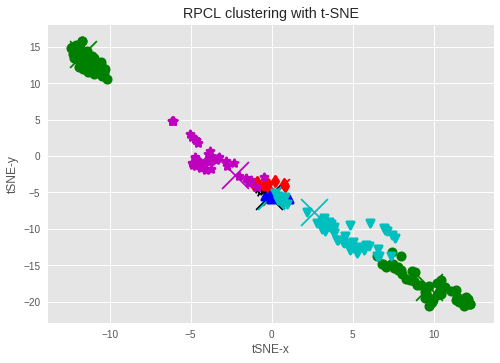

		 Cluster 1 has: 51 data points
		 Cluster 2 has: 40 data points
		 Cluster 3 has: 8 data points
		 Cluster 4 has: 6 data points
		 Cluster 5 has: 3 data points
		 Cluster 6 has: 44 data points
		 Cluster 7 has: 39 data points
		 Cluster 8 has: 9 data points


In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(QA_dataset)

markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a givn list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=8):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints (>=10% of total data), then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>99):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

#We call the fit() fucntion.
clf = K_Means()
clf.fit(x_test_2d)

fig = plt.figure()

#Plot the centroids. 
for centroid in clf.centroids:
    color = colors[centroid]
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="x", color=color, s=720, linewidths=5)

#Plot the datapoints. Their color/shape depends on their classification.
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=marker, color=color, s=50, linewidths=3)

        
plt.title('RPCL clustering with t-SNE')
plt.xlabel('tSNE-x')
plt.ylabel('tSNE-y')         
plt.show()

print('\t\t','Cluster {no} has: {number} data points'.format(no=1, number=len(clf.classifications[0])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=2, number=len(clf.classifications[1])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=3, number=len(clf.classifications[2])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=4, number=len(clf.classifications[3])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=5, number=len(clf.classifications[4])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=6, number=len(clf.classifications[5])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=7, number=len(clf.classifications[6])))
print('\t\t','Cluster {no} has: {number} data points'.format(no=8, number=len(clf.classifications[7])))

# Step 3 - Predicting the Answer

* First, we generate a small set of **100 queries** with 3 attributes: X1, X2 and z using the **Multimodal Gaussian distribution**.

In [19]:
import random
import numpy as np
import os
mu11, mu12, sigma1 = np.random.uniform(lim1,lim2,1), np.random.uniform(lim1,lim2,1), (lim2 - lim1)/2 # mean and standard deviation
mu21, mu22, sigma2 = np.random.uniform(lim3,lim4,1), np.random.uniform(lim3,lim4,1), (lim4 - lim3)/2 # mean and standard deviation

X1, X2 = np.empty([20,1]), np.empty([20,1])
#Generate X1,X2 using multi-modal Gaussian (Normal) distribution and a fixed z.
for count in range(20):
  #True random number generation.
  #https://stackoverflow.com/questions/33359740/random-number-between-0-and-1-in-python
  P = int.from_bytes(os.urandom(8), byteorder="big") / ((1 << 64) - 1) 
  if P>0.5:
    X1[count] = np.random.normal(mu11, sigma1, 1)
  else:
    X1[count] = np.random.uniform(mu12, sigma1, 1)

for count in range(20):
  P = int.from_bytes(os.urandom(8), byteorder="big") / ((1 << 64) - 1)
  if P>0.5:
    X2[count] = np.random.normal(mu21, sigma2, 1)
  else:
    X2[count] = np.random.uniform(mu22, sigma2, 1)
  
  
z1 = 0.05*(lim2 - lim1)
z2 = 0.05*(lim4 - lim3)
z = np.sqrt(z1**2 + z2**2) #z value is fixed.



X1_flattened = (X1.T).ravel()
X2_flattened = (X2.T).ravel()
query = np.empty((len(X1),3))
query[:,0] = np.abs(X1_flattened)
query[:,1] = np.abs(X2_flattened)
query[:,2] = z


print(query)

[[ 3.53874205  0.06068728  0.55665567]
 [ 3.80202458  0.34487686  0.55665567]
 [ 4.42824595  1.80357751  0.55665567]
 [ 3.94694804  0.10343432  0.55665567]
 [ 0.34069368  0.13784484  0.55665567]
 [10.91689345  1.14112479  0.55665567]
 [ 4.43740967  0.40197912  0.55665567]
 [ 2.28490309  1.03240561  0.55665567]
 [ 3.8023855   0.03756158  0.55665567]
 [ 8.85981491  1.06002675  0.55665567]
 [ 5.44579118  0.76461612  0.55665567]
 [ 5.49682629  0.69709996  0.55665567]
 [ 2.44144953  0.42734047  0.55665567]
 [ 3.56487409  0.80816833  0.55665567]
 [ 4.23879668  0.71762285  0.55665567]
 [ 5.63596799  0.34396318  0.55665567]
 [ 4.97207675  0.62766073  0.55665567]
 [ 3.19466195  0.89306155  0.55665567]
 [ 5.42200149  1.05331957  0.55665567]
 [ 5.15082411  0.11103821  0.55665567]]


* Same as in the Training phase of our model, here we **calculate** the true answers to our 100 new queries, based on the QA_dataset which we generated based on the downloaded data set.
For this purpose, we use the *calculate_y()* function.

In [20]:
def calculate_y_new(query_data, data):
  average_y = []   
  #We populate the list
  for validation_datapoint in query_data:
    y, y_final = [], []
    iter=0
    for query_datapoint in data:
      #Check if the incoming datapoint satisfies the condition, according to which it's distance from the validation datapoint is smaller or equal,
      #to the radius z of the circle with center C(X1,X2), where validation_datapoint q=[X1,X2,z].
      if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**2):
        y.append(query_datapoint[3])
        iter+=1
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]):
          y.append(query_datapoint[3])
          iter+=1  
    if iter == 0:
      y = []
      for query_datapoint in data:
        if (((query_datapoint[0] - validation_datapoint[0])**2 + (query_datapoint[1] - validation_datapoint[1])**2) <= validation_datapoint[2]**(1/2)):
          y.append(query_datapoint[3])
          iter+=1
    y_final = np.asarray(y)  
    #Calculate the average value of y.
    average_y.append(np.mean(y_final, axis=0))  
  return(average_y)    
            
        
      
      
#Run the algorithm.      
x_list = calculate_y_new(query, QA_dataset)
#print(x_list)
#In case there is a query that did not match to any datapoint from QA_dataset, to avoid error in calculations due to NaN, we set 0 value.
x_array = np.asarray(x_list)
replace = np.isnan(x_array)
x_array[replace] = 0
#We store y in the list, real_y.
real_y = x_array
print(real_y)

[14.61323584 14.67077559  6.33333333 14.70426326  0.70496532 12.16666667
 14.61585116 13.50901285 14.67280434 16.58383838 15.08886084 15.10544542
 13.94665378 14.51701745 14.7607634  15.10306198 14.51687087 13.9084798
 15.28354954 14.56354353]


* For the final part of the prediction phase, we use the *fit()* function to cluster the QA_dataset and we **predict** the answer-response for each query from the 20 quaeries, which we generated for evaluation, by classifying them to the clusters they belong to and assigning the cluster's centroid response, to the query's predicted response.


In [21]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

markers = 5*["o", "v", "d", "^", "4", "*"]
colors = 5*["g", "c", "r", "b", "k", "m"]

#This function selects the second smallest number from a givn list of numbers. 
def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')
    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2
  
class K_Means:
    def __init__(self, k=6):
        self.k = k
        
    
    def fit(self,data):
        #Create empty dictionary
        self.centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        self.classifications= {}
            
        #Create a list
        for i in range(self.k):
            self.classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            self.centroids[classification] = self.centroids[classification] + 0.1 * (featureset - self.centroids[classification])
            self.centroids[second_winner_centroid] = self.centroids[second_winner_centroid] - 0.025 * (featureset - self.centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            self.classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 10 datapoints, then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=10), then the centroid will not be at the centre of the cluster but away from it.
            for classification in self.classifications:
                if (len(self.classifications[classification])>19):
                  self.centroids[classification] = np.average(self.classifications[classification], axis=0)
        

            
                    
    #This function is redundant, but we included it for completeness.                
    def predict(self,data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
    
clf = K_Means()
clf.fit(QA_dataset)

#In pred_y list we store all the predicted answers y for every query, generated for validation.
pred_y = []
for query_data in query:
  print('Query: {number}'.format(number=query_data))
  #We calculate the Euclidean distance of the query's attributes (X1,X2) from the centroid's attributes (X1,X2). 
  #We do not know the query's answer, so we cannot include the y response value in the Eeclidean distance calculation.
  distances = [np.linalg.norm(query_data[0:1] - clf.centroids[centroid][0:1]) for centroid in clf.centroids]
  prediction = distances.index(min(distances))
  print('Predicted Cluster: {number}'.format(number=prediction))
  s = np.asarray(clf.classifications[prediction])
  predicted_y = np.average(s, axis=0)[3]
  pred_y.append(predicted_y)
  print('---------------------------')
print('List of all the predicted answers y: {number}'.format(number=pred_y))


Query: [3.53874205 0.06068728 0.55665567]
Predicted Cluster: 2
---------------------------
Query: [3.80202458 0.34487686 0.55665567]
Predicted Cluster: 2
---------------------------
Query: [4.42824595 1.80357751 0.55665567]
Predicted Cluster: 2
---------------------------
Query: [3.94694804 0.10343432 0.55665567]
Predicted Cluster: 2
---------------------------
Query: [0.34069368 0.13784484 0.55665567]
Predicted Cluster: 2
---------------------------
Query: [10.91689345  1.14112479  0.55665567]
Predicted Cluster: 3
---------------------------
Query: [4.43740967 0.40197912 0.55665567]
Predicted Cluster: 2
---------------------------
Query: [2.28490309 1.03240561 0.55665567]
Predicted Cluster: 2
---------------------------
Query: [3.8023855  0.03756158 0.55665567]
Predicted Cluster: 2
---------------------------
Query: [8.85981491 1.06002675 0.55665567]
Predicted Cluster: 5
---------------------------
Query: [5.44579118 0.76461612 0.55665567]
Predicted Cluster: 2
------------------------

# Step 4 - Evaluating the results

* Here, we calulate the **Average Means Squared Error** between the true answer y and the predicted answer y' for our generated queries.

In [26]:
error = np.sum((pred_y - real_y)**2)
average_means_squared_error = np.sqrt(error)/(len(real_y))
print('RMSE = {number}'.format(number=average_means_squared_error))

RMSE = 0.4714772641038893


* The **Normalised Average Means Squared Error** (NRMSE) between the true answer y and the predicted answer y' for our generated queries is calculated below.

In [27]:
average_y = np.average(real_y, axis=0)

enumerator = (pred_y - real_y)**2
denominator = (real_y - average_y)**2
normalised_average_means_squared_error = np.sum(np.sqrt(enumerator / denominator)) / len(real_y)

print('NRMSE = {number}'.format(number=normalised_average_means_squared_error))

NRMSE = 0.7873301618814289


In [29]:
error = np.sum(np.abs(pred_y - real_y))
mean_absolute_error = error/(len(real_y))
print('MAE = {number}'.format(number=mean_absolute_error))

MAE = 0.8831758611709223


* We calculate the **Average Means Squared Error** (RMSE) for different k values, for* k=3,4,...,16* and plot the graph.

For K = 3 the Predictive Error is 0.8483302217166593
For K = 4 the Predictive Error is 0.8498351454142821
For K = 5 the Predictive Error is 0.8464256910071676
For K = 6 the Predictive Error is 0.8094274184602905
For K = 7 the Predictive Error is 0.8094274184602905
For K = 8 the Predictive Error is 0.8085888444027404
For K = 9 the Predictive Error is 0.8054664822740012
For K = 10 the Predictive Error is 0.4710028146738633
For K = 11 the Predictive Error is 0.4710028146738633
For K = 12 the Predictive Error is 0.47098860465724457
For K = 13 the Predictive Error is 0.47098860465724457
For K = 14 the Predictive Error is 0.4714772641038893
For K = 15 the Predictive Error is 0.4714772641038893


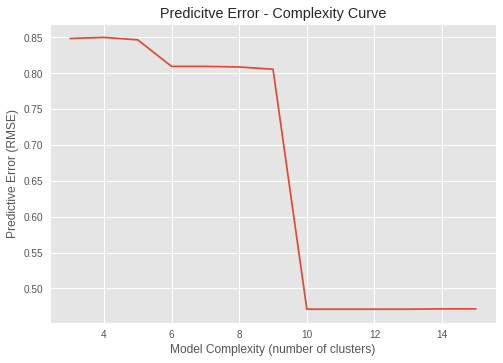

In [24]:
#We change the RPCL algorithm, to iterate over various k values.
def fit_new(k,data):
        #Create empty dictionary
        centroids = {}
        
        #We iterate through data. For k=2, the 2 first "pairs" from the dataset are used as our initial centroids.
        for i in range(k):
            centroids[i] = data[-i]
        
        
        #for self.classifications dictionary, the centroids will be the keys and the featureset will be the values of those keys.
        classifications= {}
            
        #Create a list
        for i in range(k):
            classifications[i] = []
        iter=0
                   
        #We populate the list
        for featureset in data:
            iter+=1
            #Creates a list, populated with K number of values, where each value is the distance of a datapoint from each centroid.
            distances = [np.linalg.norm(featureset - centroids[centroid]) for centroid in centroids]
            #We classify each datapoint with the index value of the minimum distance.
            classification = distances.index(min(distances))
            #Calculate 2nd closest centroid to the given datapoint.
            second_winner_distance = second_smallest(distances)                
            second_winner_centroid = distances.index(second_winner_distance)
            
            #Moving 1st winner centroid closer to the datapoint and rival centroid away from the datapoint.
            centroids[classification] = centroids[classification] + 0.1 * (featureset - centroids[classification])
            centroids[second_winner_centroid] = centroids[second_winner_centroid] - 0.025 * (featureset - centroids[second_winner_centroid])
           
            #In every iteration we add the datpoints assigned to each centroid, so that each centroid-key of the dictionary will have the according datapoints-keys assigned to it.
            classifications[classification].append(featureset)
           
            #If the formed cluster contains more than 99 datapoints, then we re-calculate it's centroid, by finding the average of all the classified datapoints.
            #If the formed cluster is relatively small (<=99), then the centroid will not be at the centre of the cluster but away from it.
            for classification in classifications:
                if (len(classifications[classification])>19):
                  centroids[classification] = np.average(classifications[classification], axis=0)
            return centroids
          
complexity = list()    
temp = list()       
for k in range(3,16):
  clf = fit_new(k, QA_dataset)
  pred_y = []
  for query_data in query:
    #We calculate the Euclidean distance of the query's attributes (X1,X2) from the centroid's attributes (X1,X2). 
    #We do not know the query's answer, so we cannot include the y response value in the Eeclidean distance calculation.
    distances = [np.linalg.norm(query_data[0:1] - clf[centroid][0:1]) for centroid in clf]
    prediction = distances.index(min(distances))
    s = clf[prediction]
    predicted_y = s[3]
    pred_y.append(predicted_y)
    
  error = np.sum((pred_y - real_y)**2)
  average_means_squared_error = np.sqrt(error)/(len(real_y))
  temp.append(average_means_squared_error)
  complexity.append(k)
  print('For K = {clusters} the Predictive Error is {number}'.format(clusters=k, number=average_means_squared_error))

plt.figure()
plt.plot(complexity, temp)
plt.xlabel("Model Complexity (number of clusters)")
plt.ylabel("Predictive Error (RMSE)")
plt.title("Predicitve Error - Complexity Curve")
plt.show()